## RUN_WALK_PREDICTION

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('walkrun.csv')

## BASIC CHECKS

In [19]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [20]:
data.info()
# there are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [21]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


-> x's acceleration is higher than acceleration of y and z
-> z's gyro is higher than gyro of y and x
-> higher the gyro(angular velocity) lesser the acceleration is 


In [22]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## CHANGING DATA TYPE

In [3]:
# combaining date time in the same column and changing the datatype
# convert 'date' and 'time' columns to datetime
from datetime import date , timedelta
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f')

In [4]:
# combine 'date' and 'time' columns into a new 'datetime' column
data['datetime'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))
data['datetime'] = data['datetime'].dt.tz_localize(None)

C:\Users\SHAMNI GAYATHRI\AppData\Local\Temp\ipykernel_7516\1047150358.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datetime'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))


In [5]:
# drop the original 'date' and 'time' columns and 'username' beacuse it does have any impact in output
data = data.drop(['date', 'time','username'], axis=1)

## PLOTS

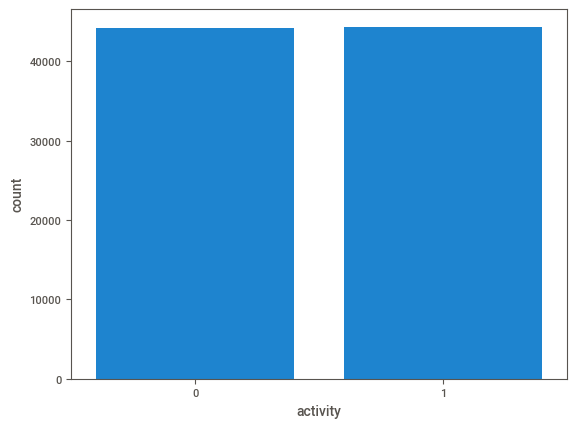

In [26]:
sns.countplot(x='activity',data=data)
plt.show()
# 0-> walking(44223) 1-> running(44365) running has slightly higher count than walking

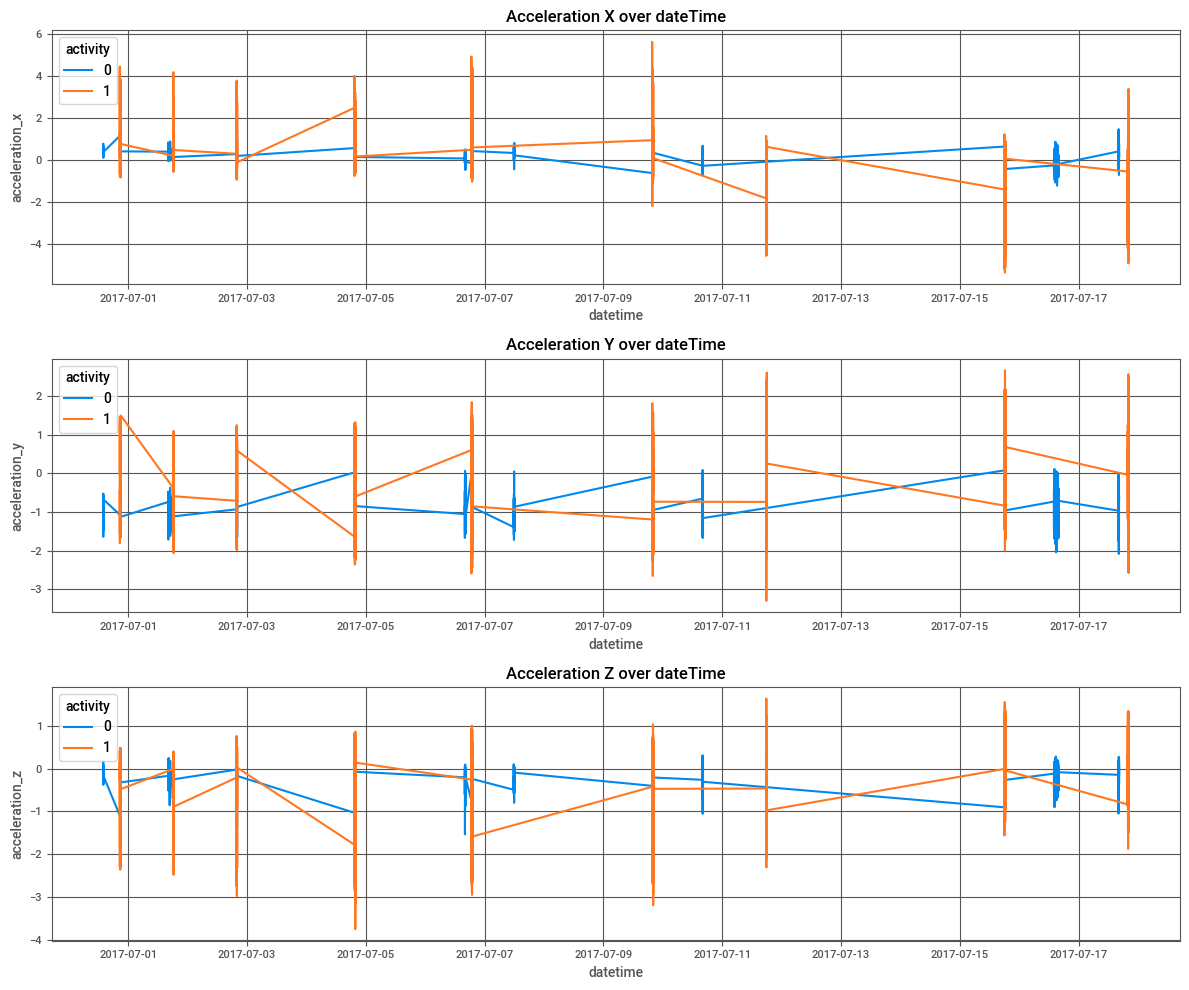

In [27]:
# line plot of acceleration and datetime compared with activity
fig, axs = plt.subplots(nrows=3, figsize=(12, 10))
# Plot 1: Acceleration X
sns.lineplot(x='datetime', y='acceleration_x', data=data,hue='activity', ax=axs[0])
axs[0].set_title('Acceleration X over dateTime')
axs[0].grid(True)
# Plot 2: Acceleration Y
sns.lineplot(x='datetime', y='acceleration_y', data=data,hue='activity', ax=axs[1])
axs[1].set_title('Acceleration Y over dateTime')
axs[1].grid(True)
# Plot 3: Acceleration Z
sns.lineplot(x='datetime', y='acceleration_z', data=data,hue='activity', ax=axs[2])
axs[2].set_title('Acceleration Z over dateTime')
axs[2].grid(True)
# Show the plot
plt.tight_layout()
plt.show()

-> x's acceleration while running is closer to 6 and greater than acceleration of y and z

-> y has both positive and negative acceleration while running is 2 and -3 between 2017-07-11 and 2017-07-13 which is highest in the entire timeline

-> z has the highest negative acceleration which is closer to -4 while running

-> x has the positive acceleration during walk

-> y has the most negative acceleration during walk

-> z has the acceleration between (0.5 to -0.5) during walk

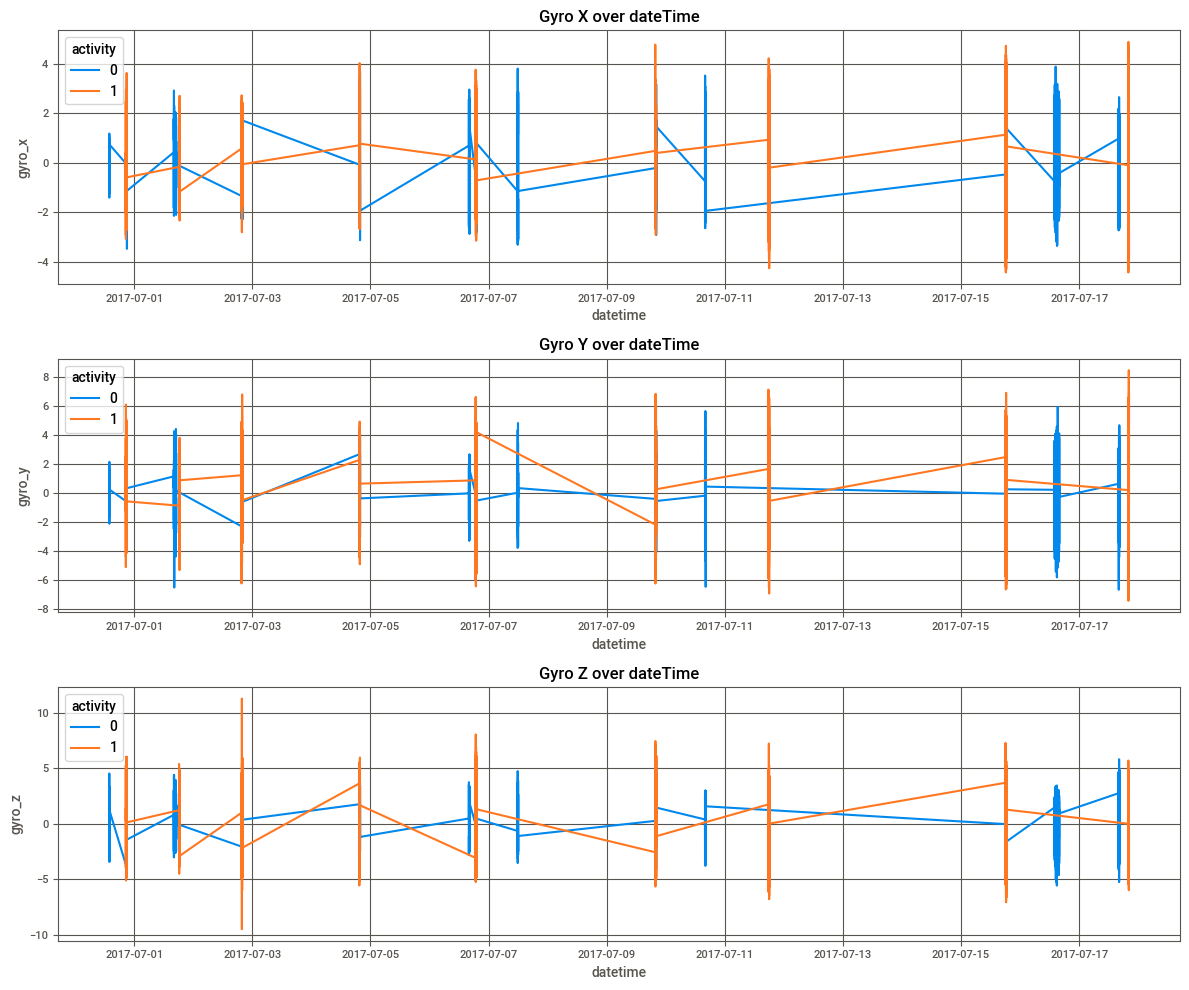

In [28]:
# line plot of gyro and datetime compared with activity 
fig, axs = plt.subplots(nrows=3, figsize=(12, 10))
# Plot 1: gyro X
sns.lineplot(x='datetime', y='gyro_x', data=data,hue='activity', ax=axs[0])
axs[0].set_title('Gyro X over dateTime')
axs[0].grid(True)
# Plot 2: gyro Y
sns.lineplot(x='datetime', y='gyro_y', data=data,hue='activity', ax=axs[1])
axs[1].set_title('Gyro Y over dateTime')
axs[1].grid(True)
# Plot 3: gyro Z
sns.lineplot(x='datetime', y='gyro_z', data=data,hue='activity', ax=axs[2])
axs[2].set_title('Gyro Z over dateTime')
axs[2].grid(True)
# Show the plot
plt.tight_layout()
plt.show()

-> gyro_z has the lowest positive and negative angular velocity while running (4 to -4) on 2017-07-17 compared to  gyro of z and y

-> gyro_y has the same positive and negative angular velocity while running (7.5 to -7.5) on 2017-07-17

-> gyro_z has the highest positive and negative angular velocity while running (10 to -10) compared to  gyro of x and y

-> if the gyro(angular velocity) is higher the acceleration(linear velocity) will be lesser while running

-> the speed of angular velocity of walking is half compared to running 


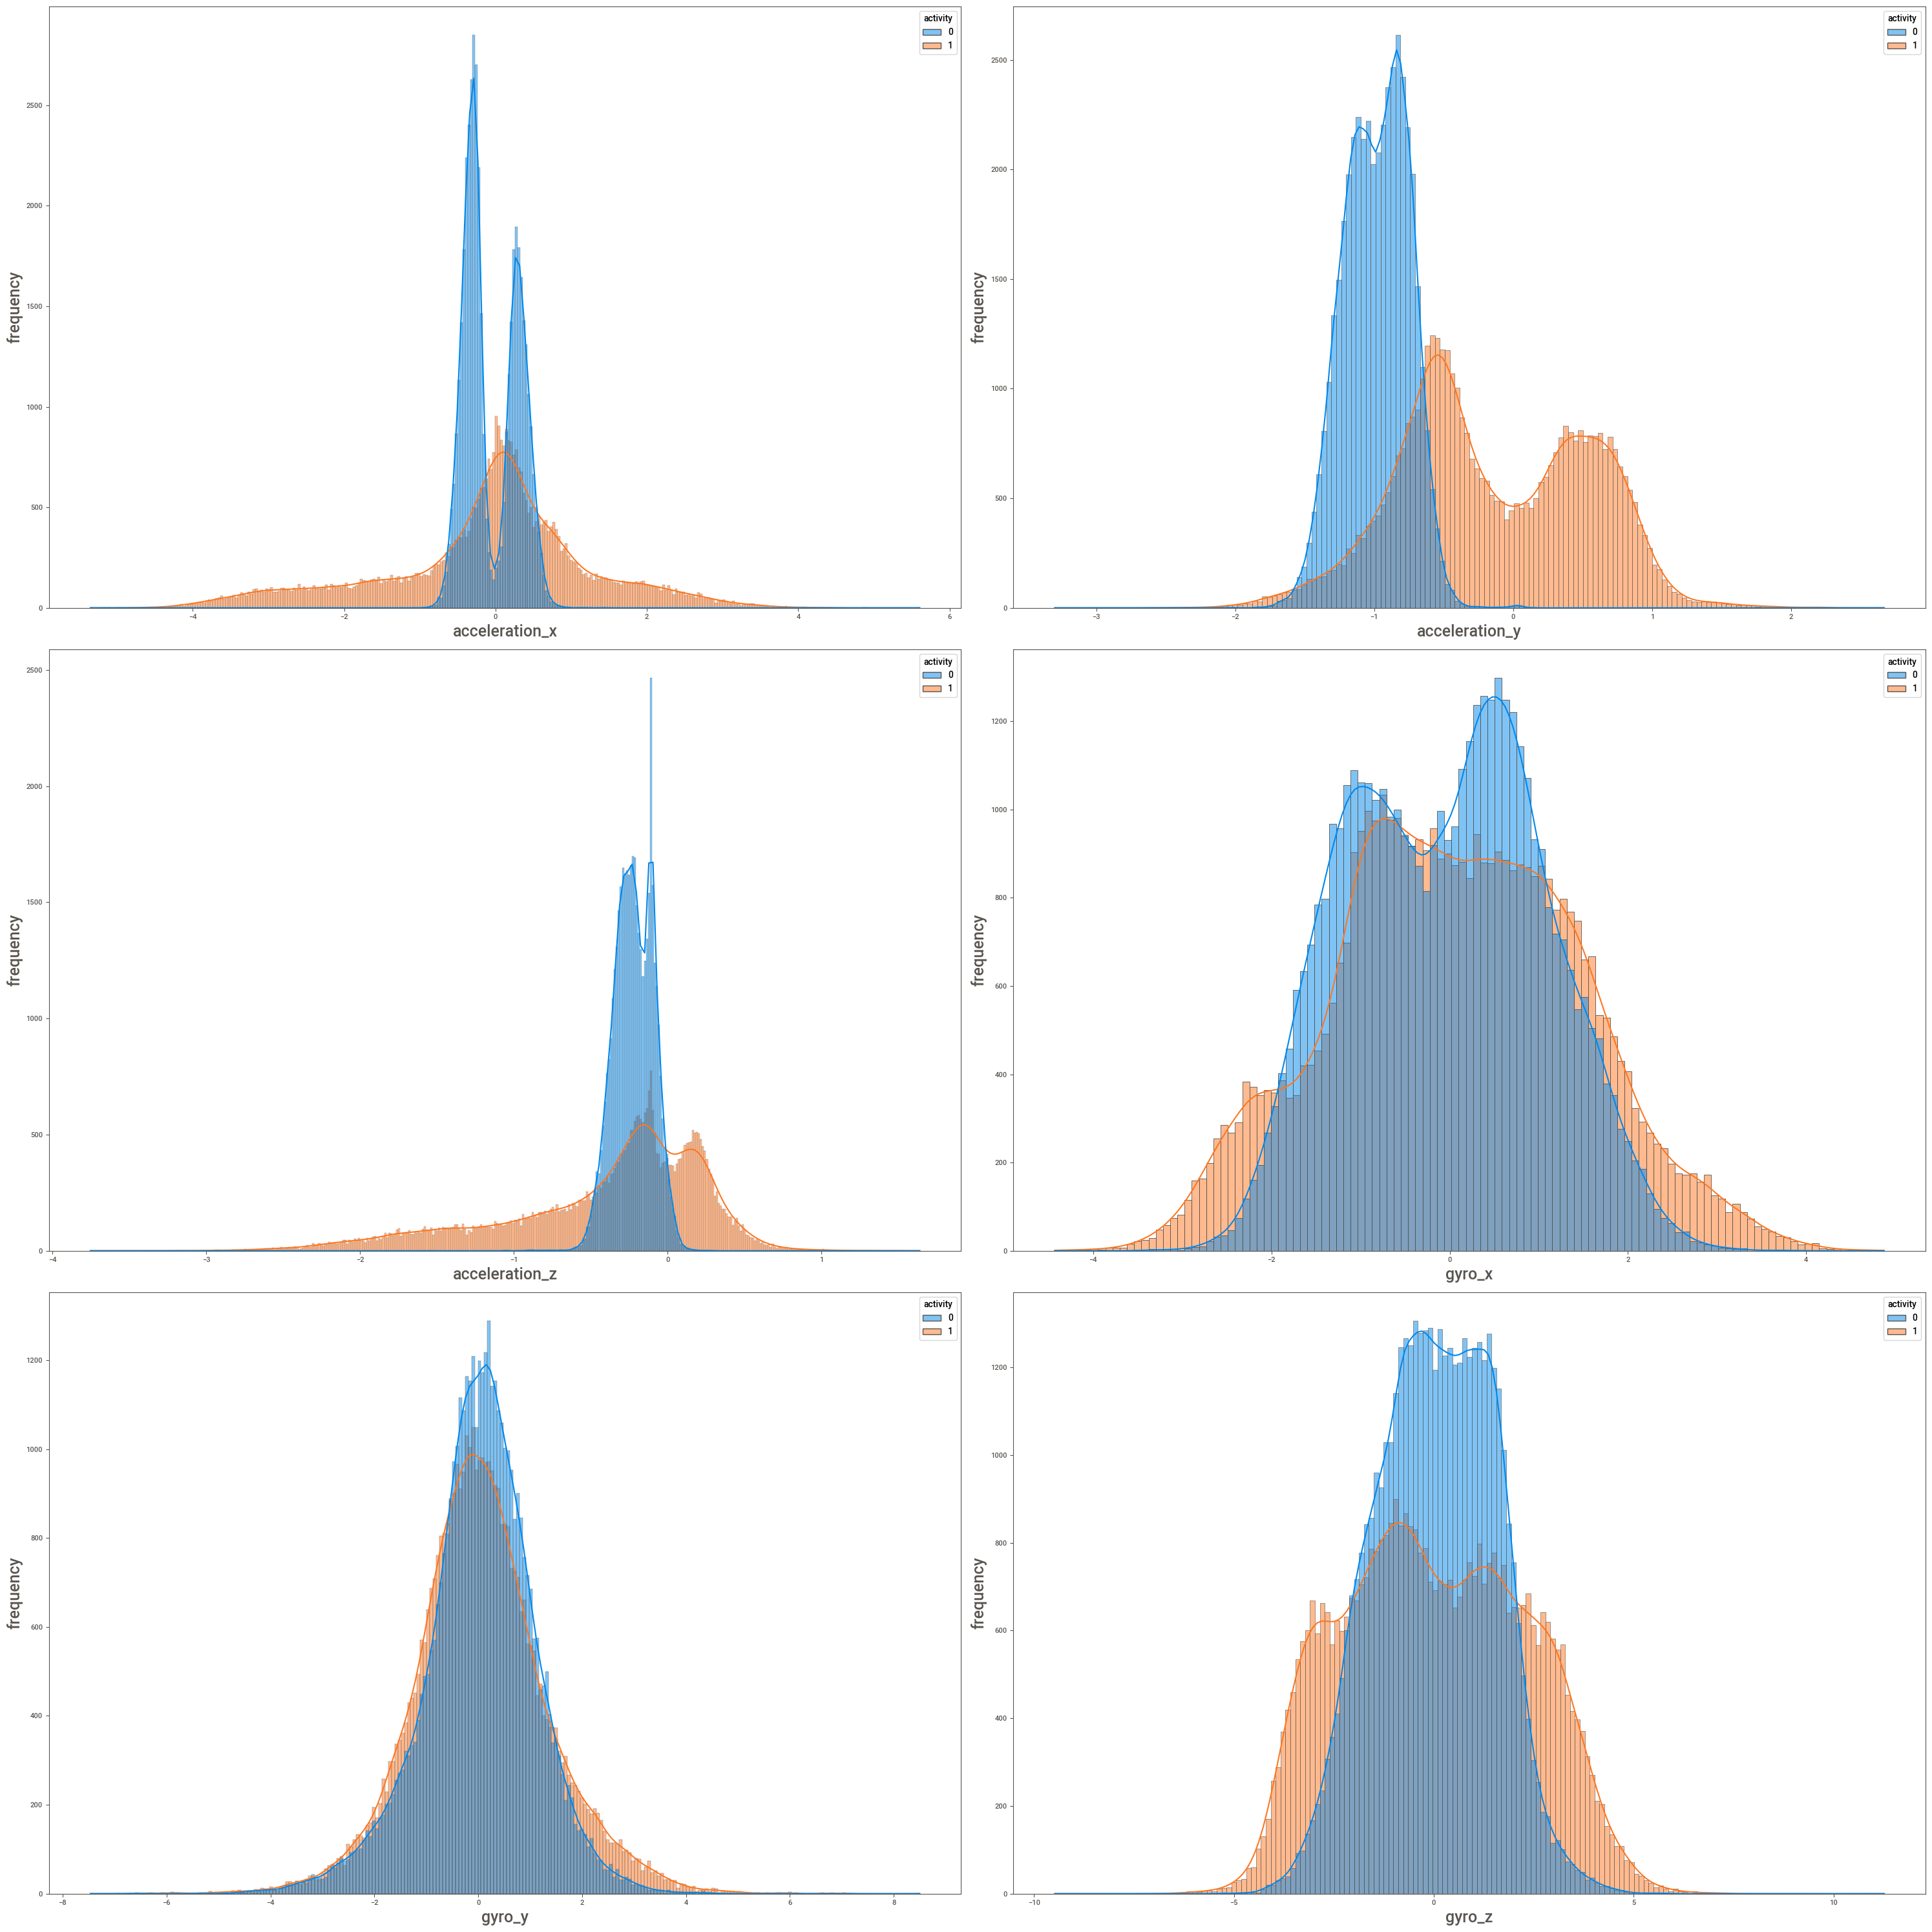

In [29]:
# hisplot of acceleration and gyro compared with activity
plt.figure(figsize=(30,30),facecolor = 'white')   
plotnumber = 1
for i in data:
    if i != 'wrist' and i != 'activity' and i != 'datetime':
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x=i,data=data,hue='activity',kde=True)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('frequency',fontsize = 18)
        plotnumber += 1
plt.tight_layout()

1)ACCELERATION_X -> Walking shows consistent acceleration patterns with distinct peaks, indicating a steady and rhythmic movement.Running has a wider range of acceleration values, reflecting dynamic and varied movements.

2)ACCELERATION_Y -> has overlapping distributions for both walking and running. However, they have different peaks, Walking tends to be more stable, while running introduces more variability.

3)ACCELERATION_Z -> walking has more stable  vertical distribution where running has more spread-out.
-> in conclution regarding acceleration walking has stable and consistent patterns, while running is characterized by a broader range of more dynamic movements.

4)GYRO_X-> The gyro_x data shows multiple peaks for both walking and running. This means that the movements in this direction are varied, making it easier to tell the difference between walking and running.

5)GYRO_Y-> has a more balanced shape for both activities. This means that the movements in this direction are quite similar for walking and running, making it harder to distinguish between the two.

6)GYRO_Z-> has overlapping yet different shapes for walking and running. This suggests that there are some noticeable differences in movements around this axis, which can help in telling the activities apart.

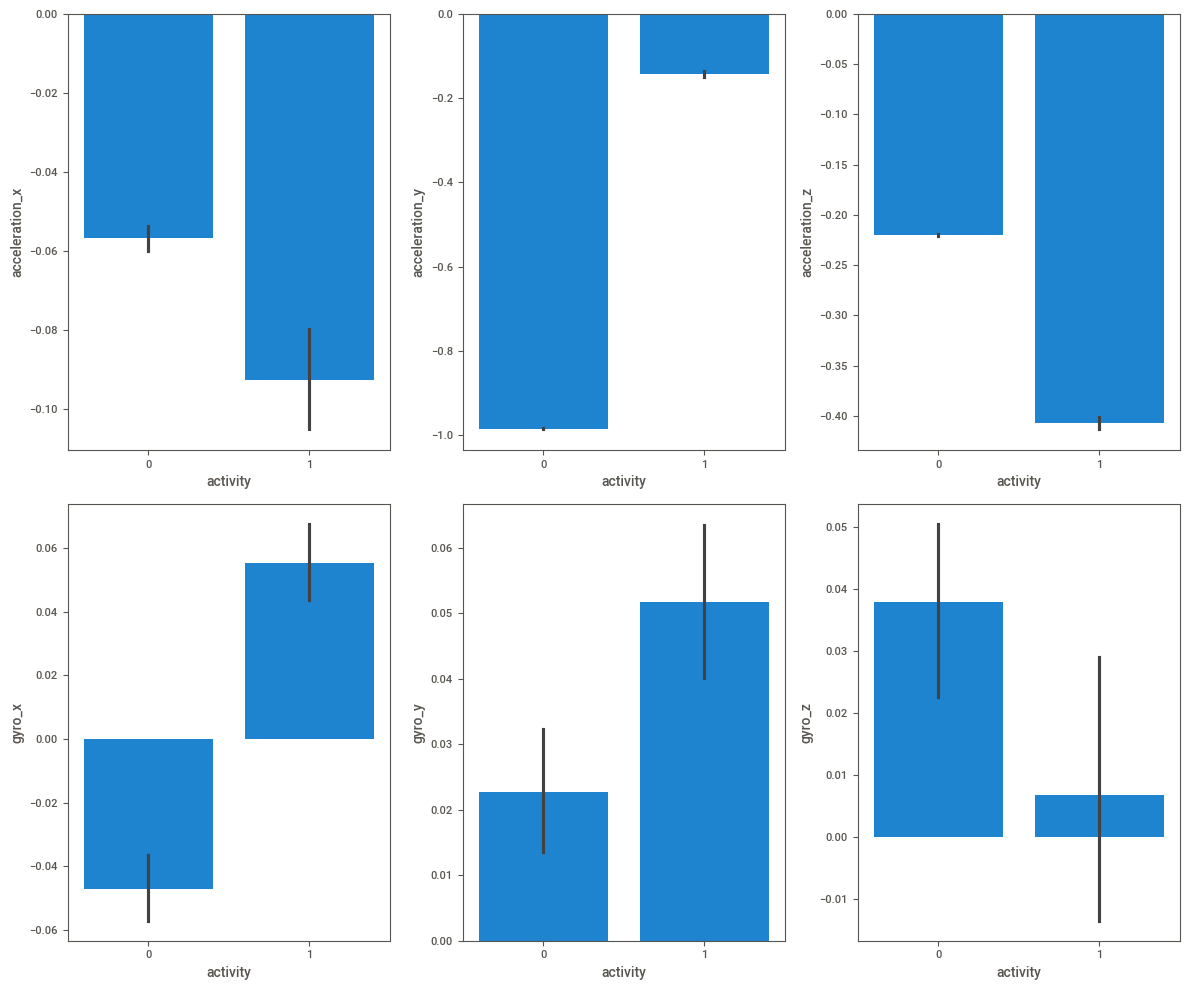

In [30]:
# BAR PLOT
fig, axs = plt.subplots(2,3,figsize=(12, 10))
sns.barplot(x='activity',y='acceleration_x',data=data, ax=axs[0,0])
sns.barplot(x='activity',y='acceleration_y',data=data, ax=axs[0,1])
sns.barplot(x='activity',y='acceleration_z',data=data, ax=axs[0,2])
sns.barplot(x='activity',y='gyro_x',data=data, ax=axs[1,0])
sns.barplot(x='activity',y='gyro_y',data=data, ax=axs[1,1])
sns.barplot(x='activity',y='gyro_z',data=data, ax=axs[1,2])
# Show the plot
plt.tight_layout()
plt.show()

-> Acceleration: The mean acceleration values in all three axes (X, Y, and Z) are notably lower for running compared to activity walking. This suggests that running involves less overall movement or is more stationary than walking.

->Gyroscope: In contrast, the mean gyroscope readings for all three axes (X, Y, and Z) are significantly higher for running compared to walking. This indicates that running likely involves a greater amount of rotation, twisting, or angular movement than walking.

## HANDLING OUTLIERS

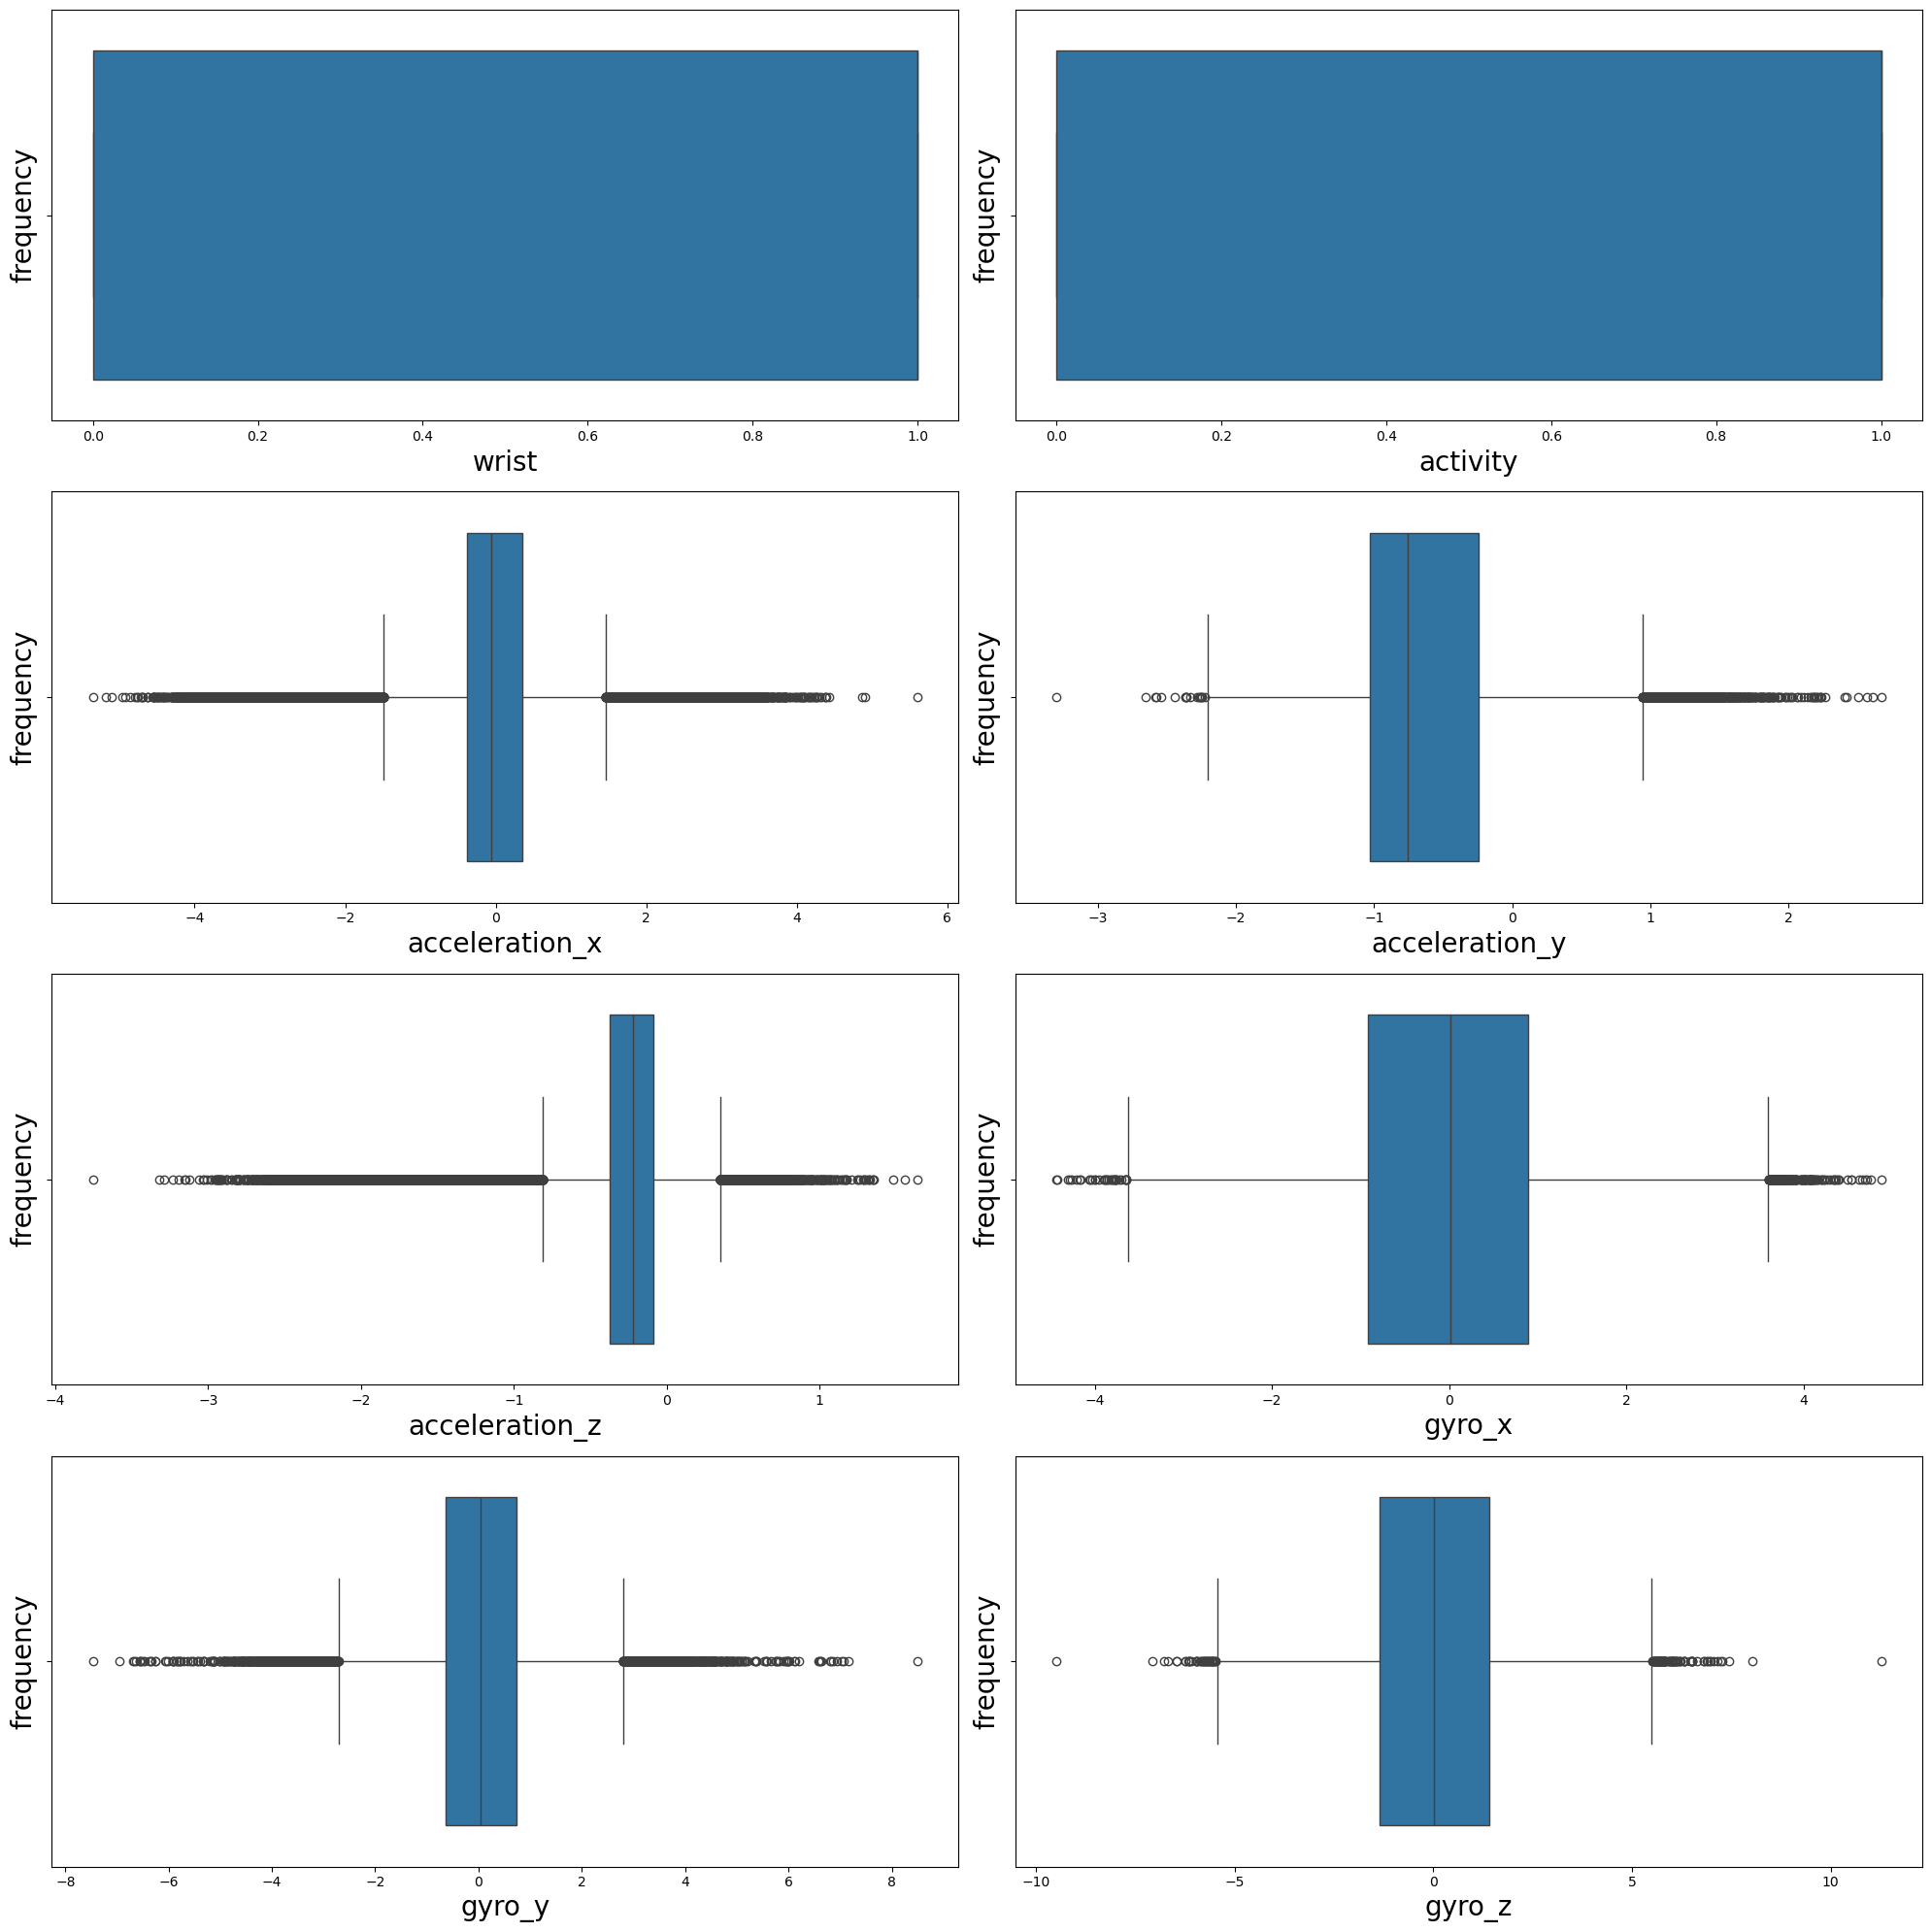

In [11]:
# handling outliers with mean since the values are in normal distribution form
plt.figure(figsize=(20,20),facecolor ='white')
plotnumber=1
for i in data:
    if i!= 'username' and i!= 'datetime':
        ax = plt.subplot(4,2,plotnumber)
        sns.boxplot(x=i,data=data)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('frequency',fontsize=20)
        plotnumber+=1
plt.tight_layout()
    

In [6]:
# chnging outliers with KNN imputation using 5 nearest neighbors for imputation.
features = ["acceleration_x", "acceleration_y", "acceleration_z","gyro_x","gyro_y","gyro_z"]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
data[features] = imputer.fit_transform(data[features])

# Now, create your KNeighborsClassifier
knn = KNeighborsClassifier()

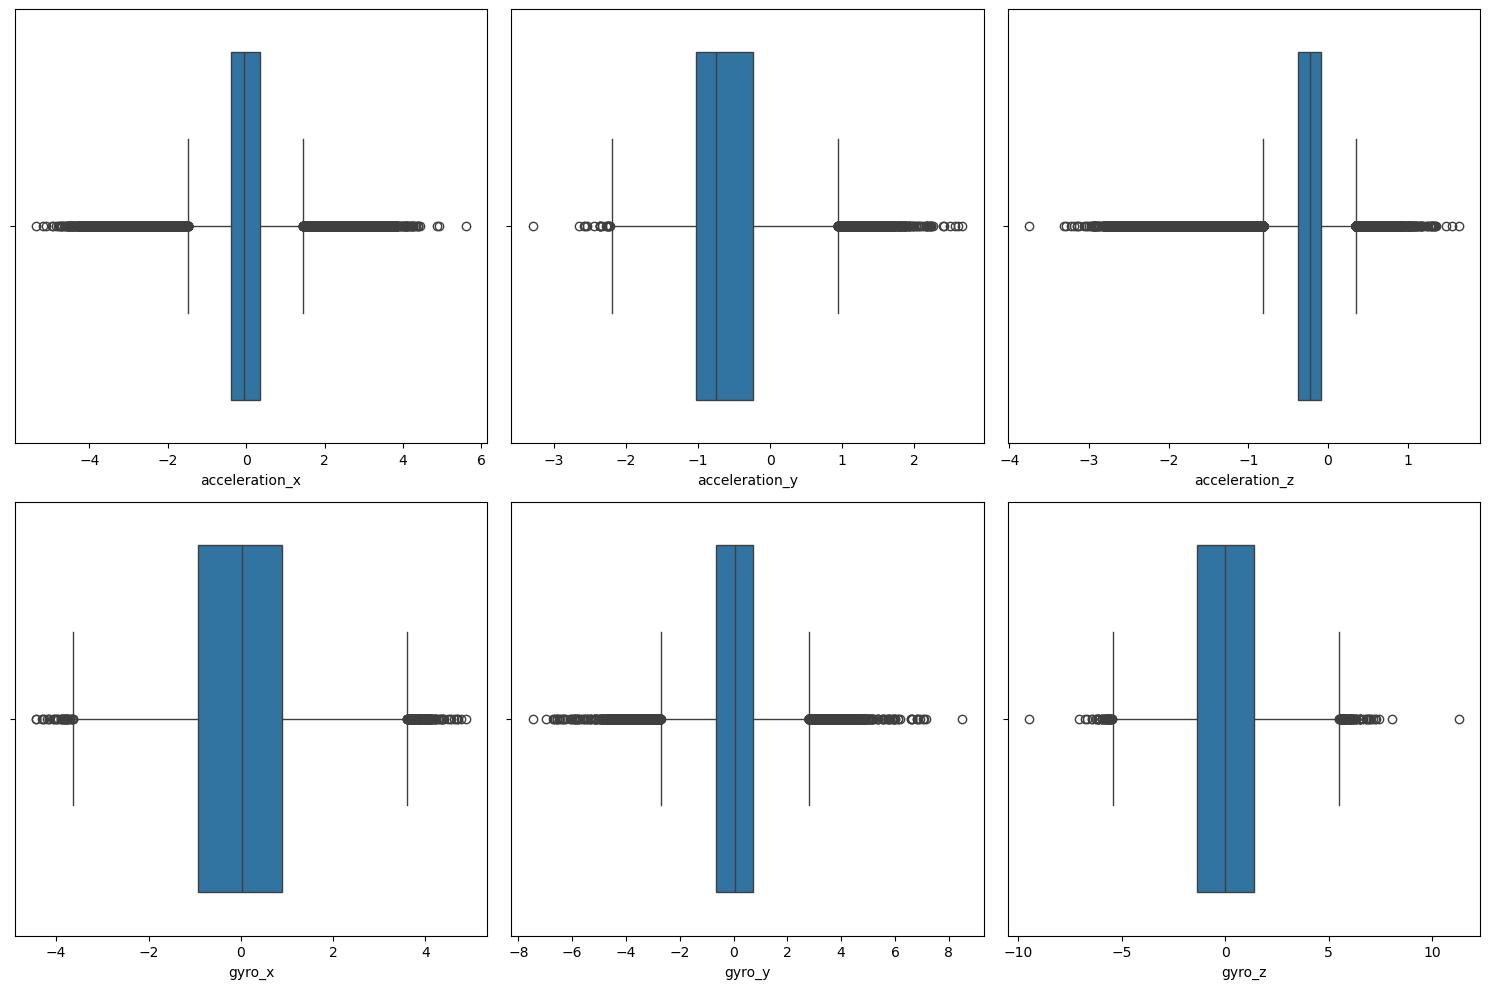

In [7]:
# box plot after filling outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(data[features]):
    sns.boxplot(x=feature, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

## SCALING THE DATA

In [11]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected features
scaler.fit(data[features])

# Transform the data
data[features] = scaler.transform(data[features])

In [12]:
# scalling the data except the datas from 'wrist' and 'activity' column
data1=data[features]
data1

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624
2,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481
3,0.374432,-0.379548,0.827334,0.092339,-0.372984,-1.544039
4,0.551090,-0.559819,0.718668,0.038726,0.334271,1.290147
...,...,...,...,...,...,...
88583,0.379683,-0.417668,0.372333,0.381469,1.647757,0.304257
88584,0.567240,-0.668406,-0.258300,0.078218,-1.079239,-0.051414
88585,0.528599,-0.934636,0.064206,-1.160158,-0.263951,-0.670664
88586,0.330738,-0.448953,0.489011,-1.213213,0.349370,-0.939101


In [13]:
data2= data.loc[:,:'activity']

In [14]:
# concading data1 and data2
df=pd.concat([data1,data2],axis=1)
df

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,wrist,activity
0,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949,0,0
1,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624,0,0
2,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481,0,0
3,0.374432,-0.379548,0.827334,0.092339,-0.372984,-1.544039,0,0
4,0.551090,-0.559819,0.718668,0.038726,0.334271,1.290147,0,0
...,...,...,...,...,...,...,...,...
88583,0.379683,-0.417668,0.372333,0.381469,1.647757,0.304257,0,0
88584,0.567240,-0.668406,-0.258300,0.078218,-1.079239,-0.051414,0,0
88585,0.528599,-0.934636,0.064206,-1.160158,-0.263951,-0.670664,0,0
88586,0.330738,-0.448953,0.489011,-1.213213,0.349370,-0.939101,0,0


## CORRELATION

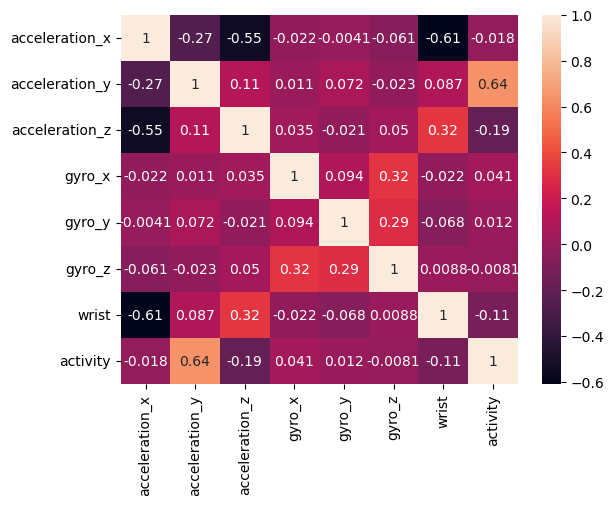

In [15]:
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=None)
plt.show()

In [17]:
# droping the columns with less correlarion
df.drop(['wrist'],axis=1,inplace=True)

In [41]:
# saving data as preprocessed data
data.to_csv('Preprocessed_data.csv')
preprocessed_data=pd.read_csv('Preprocessed_data.csv')
preprocessed_data.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
preprocessed_data

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.336985,-0.332374,0.629697,-0.050438,-0.003983,-1.542559
1,0,0.740795,-0.851810,0.163561,-0.143565,-0.013750,0.054705
2,0,0.510429,-1.396313,0.793708,-0.729935,0.057625,-1.284980
3,0,0.374768,-0.379623,0.827826,0.092324,-0.373301,-1.544650
4,0,0.551584,-0.559960,0.719102,0.038699,0.334446,1.290763
...,...,...,...,...,...,...,...
88583,0,0.380024,-0.417757,0.372582,0.381520,1.648846,0.304446
88584,0,0.567748,-0.668587,-0.258387,0.078200,-1.080046,-0.051379
88585,0,0.529072,-0.934914,0.064291,-1.160457,-0.264192,-0.670897
88586,0,0.331035,-0.449054,0.489322,-1.213524,0.349556,-0.939450


## MODEL CREATION

### 1) LOGISTIC REGRESSION

In [19]:
# creating independent variable X,y
X = df.loc[:,:'gyro_z']
y = df.activity

In [23]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression#importing randomforest
lr=LogisticRegression()#object creation 
lr.fit(X,y)#training the data
y_predict=lr.predict(X_test)#prediction

In [25]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
print(classification_report(y_test,np.round(y_predict)))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8913
           1       0.89      0.81      0.85      8805

    accuracy                           0.86     17718
   macro avg       0.86      0.86      0.86     17718
weighted avg       0.86      0.86      0.86     17718



In [26]:
# Accuracy
accuracy_lr=accuracy_score(y_test,y_predict)
accuracy_lr

0.8556270459419799

In [27]:
# total no of values of walking and running
y_test.value_counts()

activity
0    8913
1    8805
Name: count, dtype: int64

In [28]:
## confussion matrix
cm=confusion_matrix(y_test,np.round(y_predict))
conMatr = pd.DataFrame(cm, columns=['Predicted as walking', 'Predicted as Running'])
conMatr.rename({0: 'Actual walking', 1: 'Actual Running'})
## from 8913 ,8005 predicted as walking and 908 as running
## from 8805, 7155 predicted as running and 1650 as walking

,Predicted as walking,Predicted as Running
Actual walking,8005,908
Actual Running,1650,7155


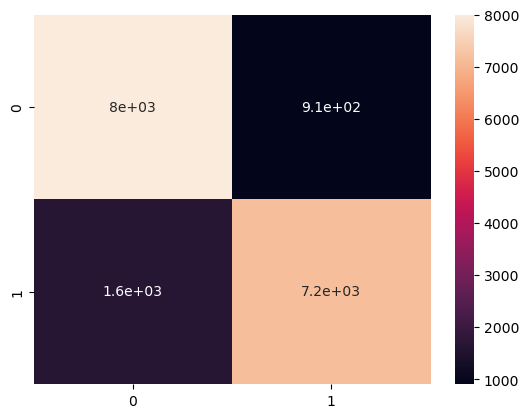

In [29]:
## heatmap for confussion matrix
sns.heatmap(cm, annot=True)
plt.show()

### 2) SUPPORT VECTOR MACHINE

In [30]:
# creating independent variable X,y
X = df.loc[:,:'gyro_z']
y = df.activity

In [31]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [32]:
# svm
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X,y)
y_predict=svclassifier.predict(X_test)

In [33]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))#it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.98      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [34]:
# Accuracy
accuracy_svm=accuracy_score(y_test,y_predict)
accuracy_svm

0.9894457613726154

In [35]:
## confussion matrix 
cm_svm=confusion_matrix(y_test,y_predict)
conMatr = pd.DataFrame(cm_svm, columns=['Predicted as walking', 'Predicted as Running'])
conMatr.rename({0: 'Actual walking', 1: 'Actual Running'})
## from 8913 ,8860 predicted as walking and 53 as running (false positive is lesser)
## from 8805, 8671 predicted as running and 134 as walking (true negative is higher)

,Predicted as walking,Predicted as Running
Actual walking,8860,53
Actual Running,134,8671


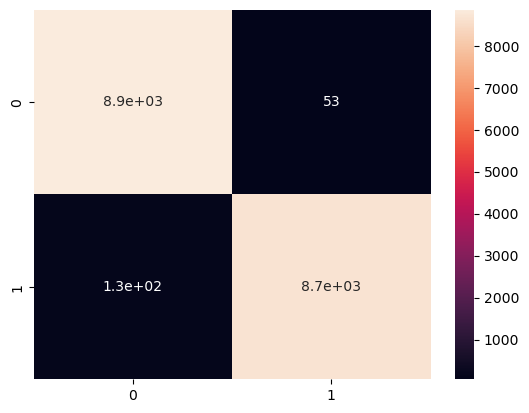

In [36]:
## heatmap for confussion matrix
sns.heatmap(cm_svm, annot=True)
plt.show()

### 3) K MEANS CLUSTERING

In [37]:
# creating independent variable X,y
X = df.loc[:,:'gyro_z']
y = df.activity

In [39]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [40]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [41]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))#it will give precision,recall,f1 scores and accu

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8913
           1       1.00      0.98      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [42]:
# Accuracy
accuracy_knn=accuracy_score(y_test,y_predict)
accuracy_knn

0.9896715204876397

In [43]:
#confussion_matrix
cm_knn=confusion_matrix(y_test,np.round(y_predict))
conMatr = pd.DataFrame(cm_knn, columns=['Predicted as walking', 'Predicted as Running'])
conMatr.rename({0: 'Actual walking', 1: 'Actual Running'})
## from 8913 ,8876 predicted as walking and 37 as running (false positive is lesser)
## from 8805, 8659 predicted as running and 146 as walking (true negative is higher)

,Predicted as walking,Predicted as Running
Actual walking,8876,37
Actual Running,146,8659


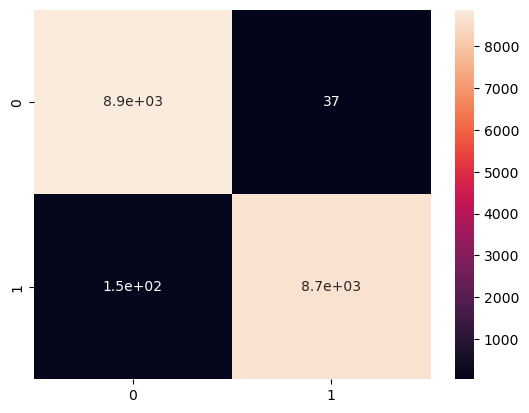

In [44]:
## heatmap for confussion matrix
sns.heatmap(cm_knn, annot=True)
plt.show()

### 4) CNN

In [45]:
# creating independent variable X,y
X = df.loc[:,:'gyro_z']
y = df.activity

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping

In [47]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Reshape data for CNN
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [49]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8185 - loss: 0.3991 - val_accuracy: 0.9279 - val_loss: 0.2014
Epoch 2/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9253 - loss: 0.2062 - val_accuracy: 0.9326 - val_loss: 0.1863
Epoch 3/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9291 - loss: 0.1943 - val_accuracy: 0.9287 - val_loss: 0.1879
Epoch 4/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9323 - loss: 0.1832 - val_accuracy: 0.9348 - val_loss: 0.1848
Epoch 5/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9324 - loss: 0.1839 - val_accuracy: 0.9377 - val_loss: 0.1767
Epoch 6/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9338 - loss: 0.1788 - val_accuracy: 0.9328 - val_loss: 0.1795
Epoch 7/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9346 - loss: 0.1800 - val_accuracy: 0.9363 - val_loss: 0.1817
Epoch 8/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9345 - loss: 0.1779 - val_accuracy: 

In [52]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Use the model to make predictions
predictions = model.predict(X_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9375 - loss: 0.1722
Test accuracy: 0.9401174187660217
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [53]:
# Use the model to make predictions
y_predict = model.predict(X_test)
# Print classification report
from sklearn.metrics import classification_report
print('Classification report:')
print(classification_report(y_test, np.round(y_predict)))

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8913
           1       0.97      0.91      0.94      8805

    accuracy                           0.94     17718
   macro avg       0.94      0.94      0.94     17718
weighted avg       0.94      0.94      0.94     17718



In [54]:
# Accuracy
accuracy_cnn=accuracy_score(y_test,np.round(y_predict))
accuracy_cnn

0.9401173947398126

In [55]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm_cnn = confusion_matrix(y_test, np.round(y_predict))
conMatr = pd.DataFrame(cm_cnn, columns=['Predicted as walking', 'Predicted as Running'])
conMatr.rename({0: 'Actual walking', 1: 'Actual Running'})
## from 8913 ,8625 predicted as walking and 288 as running 
## from 8805, 8032 predicted as running and 773 as walking 

,Predicted as walking,Predicted as Running
Actual walking,8625,288
Actual Running,773,8032


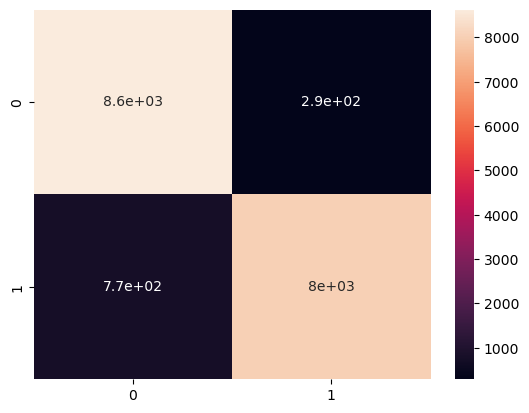

In [56]:
## heatmap for confussion matrix
sns.heatmap(cm_cnn, annot=True)
plt.show()

## COMPARISON PLOT

In [57]:
models = pd.DataFrame([accuracy_lr,accuracy_svm,accuracy_knn,accuracy_cnn],
             index=['Logistic Regression','SVM','KNN','CNN'],columns=['accuracy'])

models.sort_values('accuracy', ascending=False)

,accuracy
KNN,0.989672
SVM,0.989446
CNN,0.940117
Logistic Regression,0.855627


C:\Users\SHAMNI GAYATHRI\AppData\Local\Temp\ipykernel_7516\2875219340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = models.accuracy.sort_values(ascending=False).index,


<Axes: xlabel='None'>

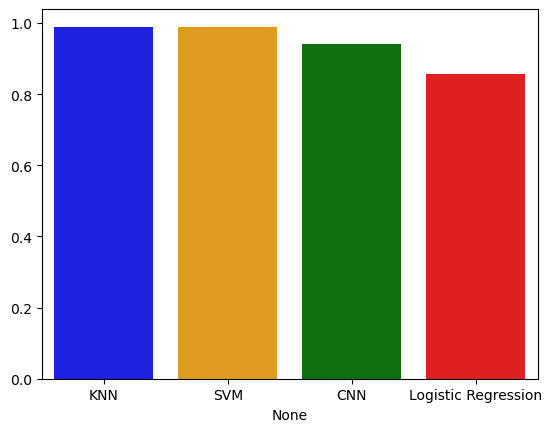

In [58]:
models.accuracy.sort_values(ascending=False).values
sns.barplot(x = models.accuracy.sort_values(ascending=False).index, 
            y = models.accuracy.sort_values(ascending=False).values,palette=['blue','orange','green','red'])

### KNN has highest accuracy in predicting the activity according to total data of walking 8913 ,8876 predicted as walking and 37 as running  , from total data of running 8805, 8659  predicted as running and 146 as walking which comparitity has lesser false positive 